In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(r"D:\AIML Projects\Trainedweights\NeuroRide\train\results.csv") # use r" " , \\ or / to escape unicode problem
print(df.head())  # Check the first few rows


   epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  1264.00         1.34432         1.15684         1.17630   
1      2  2691.51         1.16884         0.73881         1.07991   
2      3  3749.09         1.21254         0.78284         1.11240   
3      4  1163.19         1.20691         0.79394         1.12086   
4      5  2485.82         1.14437         0.73192         1.09158   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.87262            0.84397           0.90956   
1               0.88277            0.84453           0.90593   
2               0.83845            0.80477           0.86604   
3               0.89276            0.82254           0.90100   
4               0.88222            0.84675           0.90837   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.58604       1.10561       0.69731       1.03470  0.003330   
1              0.60244       1.12554       0

In [2]:
print(df.columns)


Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


## Checking For Overfitting OR Underfitting OR Just right
- **We can check this by trying to see whether the training loss and validation loss curves Converge OR Diverge**
- If Validation Loss increases linearly(or exponentially) with more training epochs it signifies potential overfitting . 
- If this is the case our model won't generalize properly on new unseen data . 

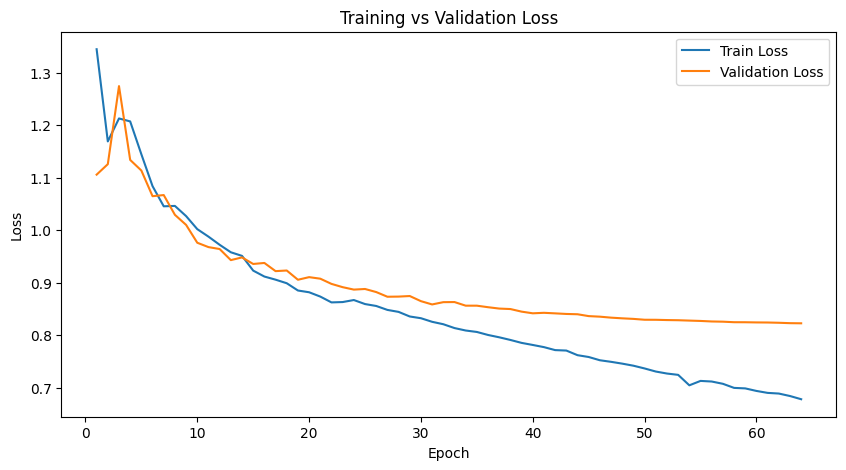

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(df["epoch"], df["train/box_loss"], label="Train Loss")
plt.plot(df["epoch"], df["val/box_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


##### Since the validation loss is increasing when we train further and train loss decreases we will stop our training here . However in future we can fine tune the model by hyperparameter tuning or tweaking learning rates

### Let's Check Model Performance Over Epochs 

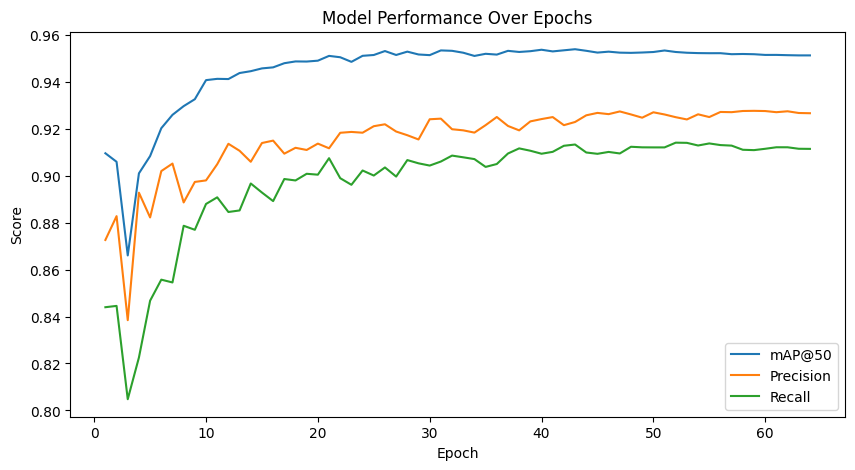

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP@50")
plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
plt.title("Model Performance Over Epochs")
plt.show()


**This Signifies** : 
- **mAP@50**: 0.95 → Excellent detection accuracy.
- **Precision**: 0.92 → Very few false positives.
- **Recall**: 0.90 → Most objects are being detected.

# Analyzing Misdetections

### 1)Loss Curves

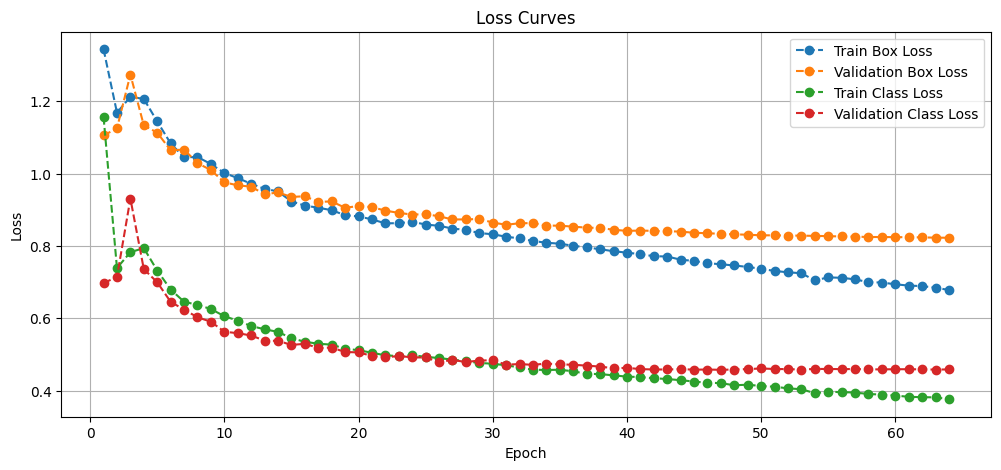

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss", linestyle="--", marker="o")
plt.plot(df["epoch"], df["val/box_loss"], label="Validation Box Loss", linestyle="--", marker="o")
plt.plot(df["epoch"], df["train/cls_loss"], label="Train Class Loss", linestyle="--", marker="o")
plt.plot(df["epoch"], df["val/cls_loss"], label="Validation Class Loss", linestyle="--", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves")
plt.legend()
plt.grid()
plt.show()

The training box loss (0.7) and validation box loss (0.85) indicate that the model has learned well, but there is still a slight gap, suggesting minor overfitting. The class loss is relatively low (train: 0.38, val: 0.49), which shows the model is classifying effectively. However, we can leave space for further tuning if needed later.

### 2)Precision, Recall, and mAP Trends

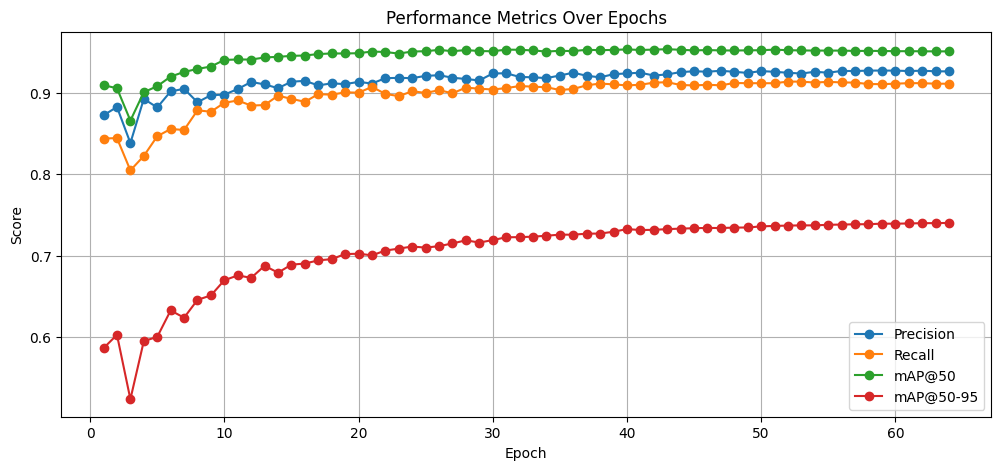

In [20]:
plt.figure(figsize=(12, 5))
plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision", marker="o")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall", marker="o")
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP@50", marker="o")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP@50-95", marker="o")

plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Performance Metrics Over Epochs")
plt.legend()
plt.grid()
plt.show()


The model exhibits strong precision (0.93) and recall (0.91), indicating a good balance between correctly detected and missed objects. The mAP@50 (0.97) is excellent, showing that the model performs well at standard IoU thresholds. The mAP@50-95 (0.74) suggests that performance slightly drops at stricter IoU thresholds, which is expected but can be fine-tuned later if required.

### 3)Learning Rate Scheduler

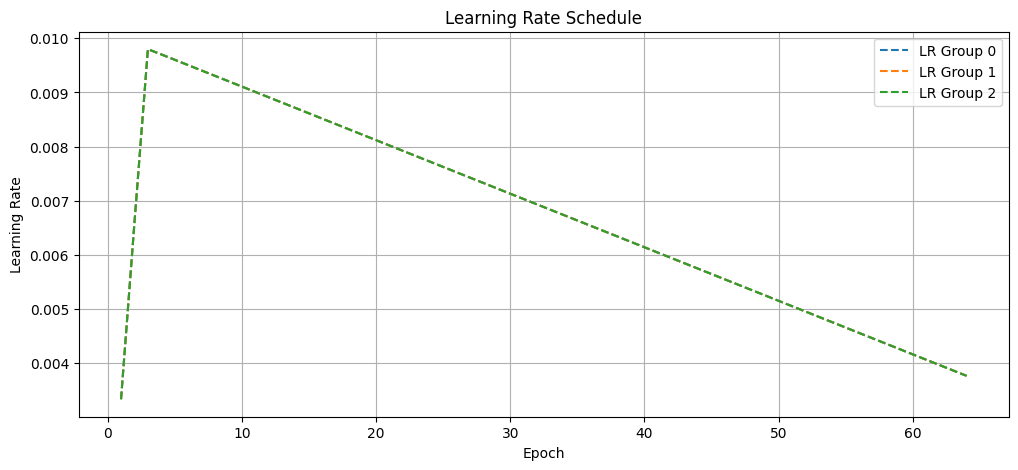

In [21]:
plt.figure(figsize=(12, 5))
plt.plot(df["epoch"], df["lr/pg0"], label="LR Group 0", linestyle="--")
plt.plot(df["epoch"], df["lr/pg1"], label="LR Group 1", linestyle="--")
plt.plot(df["epoch"], df["lr/pg2"], label="LR Group 2", linestyle="--")

plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule")
plt.legend()
plt.grid()
plt.show()


The learning rate stabilizing around 0.004 suggests that training has converged properly, with no major fluctuations, ensuring stable learning progress.

Overall, the model is performing well, with minor areas for potential refinement if needed in the future.